In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from tabulate import tabulate
import seaborn as sns
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
param_grid_rf = {
    "n_estimators": range(1, 101),
    "max_features": ["sqrt", "log2"],
    "criterion": ["entropy"],
    "max_samples": [0.5, 0.7, 1.0]
}

# 1 sekundowe pliki

## 13 cech

In [3]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_13_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_13_mfcc_features_with_labels_1sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [7]:
results_rf = []

for n_estimators in param_grid_rf["n_estimators"]:
    for max_features in param_grid_rf["max_features"]:
        for criterion in param_grid_rf["criterion"]:
            for max_samples in param_grid_rf["max_samples"]:
                try:
                    rf_model = RandomForestClassifier(
                        n_estimators=n_estimators,
                        max_features=max_features,
                        criterion=criterion,
                        max_samples=max_samples,
                        random_state=42
                    )
                    start_time = time.time()
                    rf_model.fit(X_train, y_train)
                    training_time = time.time() - start_time

                    y_pred_rf = rf_model.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred_rf)
                    f1 = f1_score(y_test, y_pred_rf, average='weighted')
                    recall = recall_score(y_test, y_pred_rf, average='weighted')
                    precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division = 0)

                    results_rf.append({
                        "n_estimators": n_estimators,
                        "max_features": max_features,
                        "criterion": criterion,
                        "max_samples": max_samples,
                        "Accuracy": accuracy,
                        "F1 Score": f1,
                        "Recall": recall,
                        "Precision": precision,
                        "Training Time (s)": training_time
                    })
                except Exception as e:
                    print(f"Error with n_estimators={n_estimators}, max_features={max_features}, max_samples={max_samples}: {e}")

metrics_rf = ["Accuracy", "F1 Score", "Recall", "Precision"]
best_rf_models = {metric: max(results_rf, key=lambda x: x[metric]) for metric in metrics_rf}
best_rf_models["Training Time"] = min(results_rf, key=lambda x: x["Training Time (s)"])

all_models_rf_table = [
    [res["n_estimators"], res["max_features"], res["criterion"], res["max_samples"], res["Accuracy"], res["F1 Score"], 
     res["Recall"], res["Precision"], res["Training Time (s)"]]
    for res in results_rf
]

best_models_rf_table = [
    [metric, 
     best_rf_models[metric]["n_estimators"], 
     best_rf_models[metric]["max_features"], 
     best_rf_models[metric]["criterion"],
     best_rf_models[metric]["max_samples"],
     best_rf_models[metric]["Accuracy"], 
     best_rf_models[metric]["F1 Score"], 
     best_rf_models[metric]["Recall"], 
     best_rf_models[metric]["Precision"], 
     best_rf_models[metric]["Training Time (s)"]]
    for metric in metrics_rf + ["Training Time"]
]

print("Best Models (Random Forest):")
print(tabulate(best_models_rf_table, headers=[
    "Metric", "n_estimators", "max_features", "criterion", "max_samples", "Accuracy", "F1 Score", "Recall", "Precision", "Training Time (s)"
], tablefmt="fancy_grid"))


KeyboardInterrupt: 

In [5]:
print(tabulate(all_models_rf_table, headers=[
    "n_estimators", "max_features", "criterion", "Accuracy", "F1 Score", "Recall", "Precision", "Training Time (s)"
], tablefmt="fancy_grid"))

╒═════╤════════════════╤════════════════╤═════════════╤════════════╤════════════╤══════════╤═════════════╤═════════════════════╕
│     │ n_estimators   │ max_features   │   criterion │   Accuracy │   F1 Score │   Recall │   Precision │   Training Time (s) │
╞═════╪════════════════╪════════════════╪═════════════╪════════════╪════════════╪══════════╪═════════════╪═════════════════════╡
│   1 │ sqrt           │ entropy        │         0.5 │   0.85497  │   0.854963 │ 0.85497  │    0.855074 │           0.0760043 │
├─────┼────────────────┼────────────────┼─────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│   1 │ sqrt           │ entropy        │         0.7 │   0.855873 │   0.85575  │ 0.855873 │    0.855704 │           0.0975578 │
├─────┼────────────────┼────────────────┼─────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│   1 │ sqrt           │ entropy        │         1   │   0.870181 │   0.87039  │ 0.870181 │    0

 Random forest:
  Dokładność (Accuracy): 0.9523
  Precyzja (Precision): 0.9523
  Recall: 0.9523
  F1 Score: 0.9522
  Czas treningu: 6.7084 sekund

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1660
           1       0.91      0.92      0.92      1660
           2       0.94      0.93      0.94      1660
           3       0.98      0.98      0.98      1660

    accuracy                           0.95      6640
   macro avg       0.95      0.95      0.95      6640
weighted avg       0.95      0.95      0.95      6640



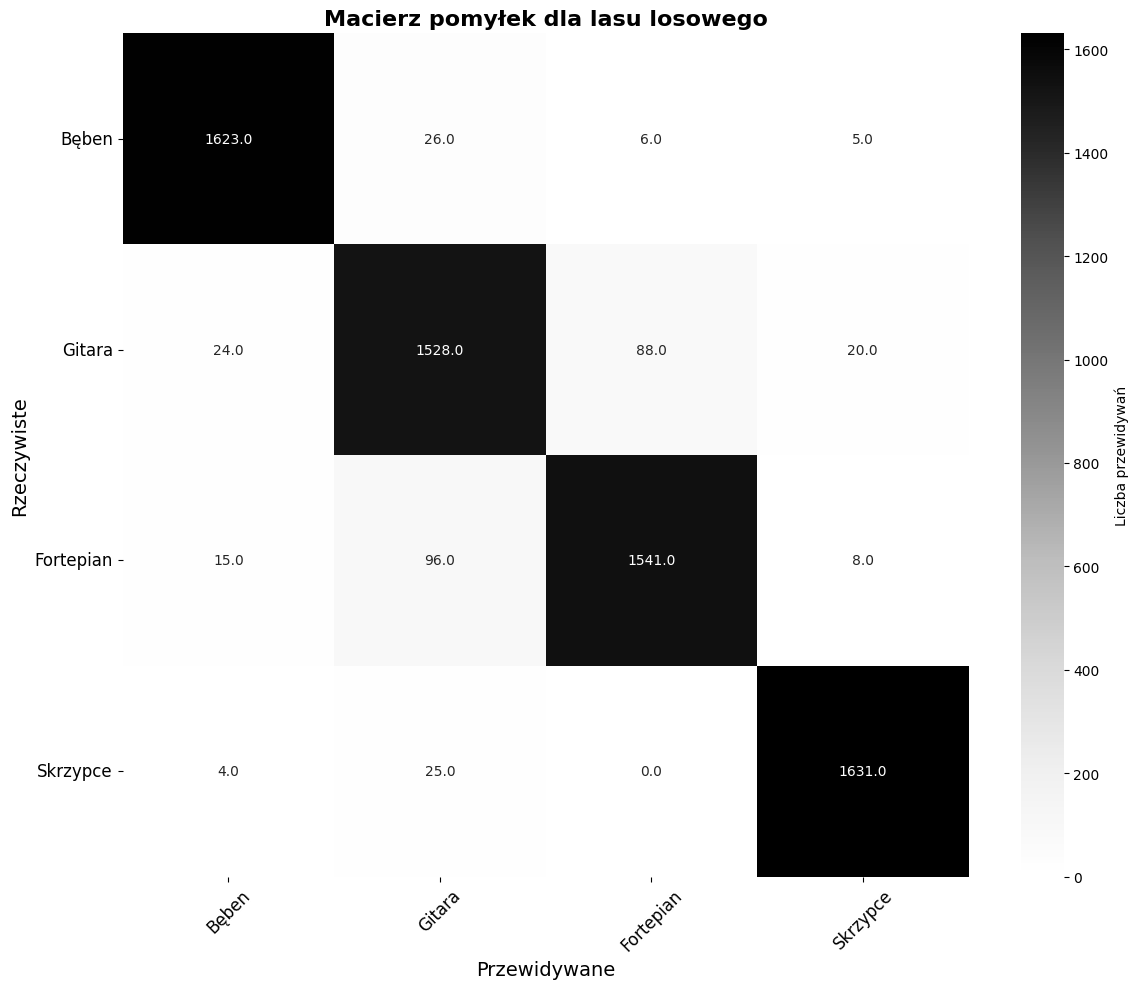

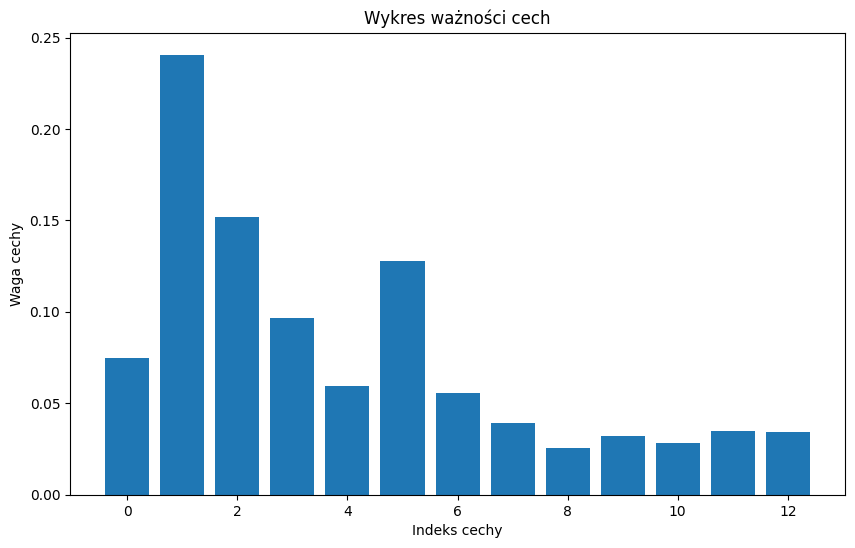

In [8]:
model = RandomForestClassifier(
    n_estimators=55,
    max_samples= 1.0, 
    max_features='sqrt',
    criterion='entropy',
    random_state=42,

)

start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

unique_labels = y_test.unique()
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(" Random forest:")
print(f"  Dokładność (Accuracy): {accuracy:.4f}")
print(f"  Precyzja (Precision): {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Czas treningu: {training_time:.4f} sekund")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(label) for label in sorted(unique_labels)], zero_division=1))


label_mapping = {
    0: "Bęben",
    1: "Gitara",
    2: "Fortepian",
    3: "Skrzypce"
}


sorted_labels = np.sort(unique_labels)
mapped_labels = [label_mapping[label] for label in sorted_labels]
conf_matrix = confusion_matrix(y_test, y_pred, labels=sorted_labels)


plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Greys", 
            xticklabels=mapped_labels, yticklabels=mapped_labels, cbar_kws={'label': 'Liczba przewidywań'})

plt.xlabel("Przewidywane", fontsize=14)
plt.ylabel("Rzeczywiste", fontsize=14)
plt.title("Macierz pomyłek dla lasu losowego", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


## 30 cech

In [3]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_30_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_30_mfcc_features_with_labels_1sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [4]:
results_rf = []

for n_estimators in param_grid_rf["n_estimators"]:
    for max_features in param_grid_rf["max_features"]:
        for criterion in param_grid_rf["criterion"]:
            for max_samples in param_grid_rf["max_samples"]:
                try:
                    rf_model = RandomForestClassifier(
                        n_estimators=n_estimators,
                        max_features=max_features,
                        criterion=criterion,
                        max_samples=max_samples,
                        random_state=42
                    )
                    start_time = time.time()
                    rf_model.fit(X_train, y_train)
                    training_time = time.time() - start_time

                    y_pred_rf = rf_model.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred_rf)
                    f1 = f1_score(y_test, y_pred_rf, average='weighted')
                    recall = recall_score(y_test, y_pred_rf, average='weighted')
                    precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division = 0)

                    results_rf.append({
                        "n_estimators": n_estimators,
                        "max_features": max_features,
                        "criterion": criterion,
                        "max_samples": max_samples,
                        "Accuracy": accuracy,
                        "F1 Score": f1,
                        "Recall": recall,
                        "Precision": precision,
                        "Training Time (s)": training_time
                    })
                except Exception as e:
                    print(f"Error with n_estimators={n_estimators}, max_features={max_features}, max_samples={max_samples}: {e}")

metrics_rf = ["Accuracy", "F1 Score", "Recall", "Precision"]
best_rf_models = {metric: max(results_rf, key=lambda x: x[metric]) for metric in metrics_rf}
best_rf_models["Training Time"] = min(results_rf, key=lambda x: x["Training Time (s)"])

all_models_rf_table = [
    [res["n_estimators"], res["max_features"], res["criterion"], res["max_samples"], res["Accuracy"], res["F1 Score"], 
     res["Recall"], res["Precision"], res["Training Time (s)"]]
    for res in results_rf
]

best_models_rf_table = [
    [metric, 
     best_rf_models[metric]["n_estimators"], 
     best_rf_models[metric]["max_features"], 
     best_rf_models[metric]["criterion"],
     best_rf_models[metric]["max_samples"],
     best_rf_models[metric]["Accuracy"], 
     best_rf_models[metric]["F1 Score"], 
     best_rf_models[metric]["Recall"], 
     best_rf_models[metric]["Precision"], 
     best_rf_models[metric]["Training Time (s)"]]
    for metric in metrics_rf + ["Training Time"]
]

print("Best Models (Random Forest):")
print(tabulate(best_models_rf_table, headers=[
    "Metric", "n_estimators", "max_features", "criterion", "max_samples", "Accuracy", "F1 Score", "Recall", "Precision", "Training Time (s)"
], tablefmt="fancy_grid"))


Best Models for Each Metric (Random Forest):
╒═══════════════╤════════════════╤════════════════╤═════════════╤═══════════════╤════════════╤════════════╤══════════╤═════════════╤═════════════════════╕
│ Metric        │   n_estimators │ max_features   │ criterion   │   max_samples │   Accuracy │   F1 Score │   Recall │   Precision │   Training Time (s) │
╞═══════════════╪════════════════╪════════════════╪═════════════╪═══════════════╪════════════╪════════════╪══════════╪═════════════╪═════════════════════╡
│ Accuracy      │             60 │ log2           │ entropy     │           1   │   0.960392 │   0.960352 │ 0.960392 │    0.960368 │           9.98394   │
├───────────────┼────────────────┼────────────────┼─────────────┼───────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│ F1 Score      │             60 │ log2           │ entropy     │           1   │   0.960392 │   0.960352 │ 0.960392 │    0.960368 │           9.98394   │
├───────────────┼────────

In [5]:
print(tabulate(all_models_rf_table, headers=[
    "n_estimators", "max_features", "criterion", "Accuracy", "F1 Score", "Recall", "Precision", "Training Time (s)"
], tablefmt="fancy_grid"))

╒═════╤════════════════╤════════════════╤═════════════╤════════════╤════════════╤══════════╤═════════════╤═════════════════════╕
│     │ n_estimators   │ max_features   │   criterion │   Accuracy │   F1 Score │   Recall │   Precision │   Training Time (s) │
╞═════╪════════════════╪════════════════╪═════════════╪════════════╪════════════╪══════════╪═════════════╪═════════════════════╡
│   1 │ sqrt           │ entropy        │         0.5 │   0.850753 │   0.850152 │ 0.850753 │    0.849744 │           0.124035  │
├─────┼────────────────┼────────────────┼─────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│   1 │ sqrt           │ entropy        │         0.7 │   0.850452 │   0.850037 │ 0.850452 │    0.84972  │           0.160035  │
├─────┼────────────────┼────────────────┼─────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│   1 │ sqrt           │ entropy        │         1   │   0.852259 │   0.852109 │ 0.852259 │    0

## 50 cech

In [6]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_50_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_50_mfcc_features_with_labels_1sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [7]:
results_rf = []

for n_estimators in param_grid_rf["n_estimators"]:
    for max_features in param_grid_rf["max_features"]:
        for criterion in param_grid_rf["criterion"]:
            for max_samples in param_grid_rf["max_samples"]:
                try:
                    rf_model = RandomForestClassifier(
                        n_estimators=n_estimators,
                        max_features=max_features,
                        criterion=criterion,
                        max_samples=max_samples,
                        random_state=42
                    )
                    start_time = time.time()
                    rf_model.fit(X_train, y_train)
                    training_time = time.time() - start_time

                    y_pred_rf = rf_model.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred_rf)
                    f1 = f1_score(y_test, y_pred_rf, average='weighted')
                    recall = recall_score(y_test, y_pred_rf, average='weighted')
                    precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division = 0)

                    results_rf.append({
                        "n_estimators": n_estimators,
                        "max_features": max_features,
                        "criterion": criterion,
                        "max_samples": max_samples,
                        "Accuracy": accuracy,
                        "F1 Score": f1,
                        "Recall": recall,
                        "Precision": precision,
                        "Training Time (s)": training_time
                    })
                except Exception as e:
                    print(f"Error with n_estimators={n_estimators}, max_features={max_features}, max_samples={max_samples}: {e}")

metrics_rf = ["Accuracy", "F1 Score", "Recall", "Precision"]
best_rf_models = {metric: max(results_rf, key=lambda x: x[metric]) for metric in metrics_rf}
best_rf_models["Training Time"] = min(results_rf, key=lambda x: x["Training Time (s)"])

all_models_rf_table = [
    [res["n_estimators"], res["max_features"], res["criterion"], res["max_samples"], res["Accuracy"], res["F1 Score"], 
     res["Recall"], res["Precision"], res["Training Time (s)"]]
    for res in results_rf
]

best_models_rf_table = [
    [metric, 
     best_rf_models[metric]["n_estimators"], 
     best_rf_models[metric]["max_features"], 
     best_rf_models[metric]["criterion"],
     best_rf_models[metric]["max_samples"],
     best_rf_models[metric]["Accuracy"], 
     best_rf_models[metric]["F1 Score"], 
     best_rf_models[metric]["Recall"], 
     best_rf_models[metric]["Precision"], 
     best_rf_models[metric]["Training Time (s)"]]
    for metric in metrics_rf + ["Training Time"]
]

print("Best Models (Random Forest):")
print(tabulate(best_models_rf_table, headers=[
    "Metric", "n_estimators", "max_features", "criterion", "max_samples", "Accuracy", "F1 Score", "Recall", "Precision", "Training Time (s)"
], tablefmt="fancy_grid"))


Best Models for Each Metric (Random Forest):
╒═══════════════╤════════════════╤════════════════╤═════════════╤═══════════════╤════════════╤════════════╤══════════╤═════════════╤═════════════════════╕
│ Metric        │   n_estimators │ max_features   │ criterion   │   max_samples │   Accuracy │   F1 Score │   Recall │   Precision │   Training Time (s) │
╞═══════════════╪════════════════╪════════════════╪═════════════╪═══════════════╪════════════╪════════════╪══════════╪═════════════╪═════════════════════╡
│ Accuracy      │             80 │ log2           │ entropy     │           1   │   0.967169 │   0.967172 │ 0.967169 │    0.96723  │           18.7916   │
├───────────────┼────────────────┼────────────────┼─────────────┼───────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│ F1 Score      │             80 │ log2           │ entropy     │           1   │   0.967169 │   0.967172 │ 0.967169 │    0.96723  │           18.7916   │
├───────────────┼────────

In [8]:
print(tabulate(all_models_rf_table, headers=[
    "n_estimators", "max_features", "criterion", "Accuracy", "F1 Score", "Recall", "Precision", "Training Time (s)"
], tablefmt="fancy_grid"))

╒═════╤════════════════╤════════════════╤═════════════╤════════════╤════════════╤══════════╤═════════════╤═════════════════════╕
│     │ n_estimators   │ max_features   │   criterion │   Accuracy │   F1 Score │   Recall │   Precision │   Training Time (s) │
╞═════╪════════════════╪════════════════╪═════════════╪════════════╪════════════╪══════════╪═════════════╪═════════════════════╡
│   1 │ sqrt           │ entropy        │         0.5 │   0.844277 │   0.843871 │ 0.844277 │    0.843661 │            0.179034 │
├─────┼────────────────┼────────────────┼─────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│   1 │ sqrt           │ entropy        │         0.7 │   0.850602 │   0.850156 │ 0.850602 │    0.849895 │            0.227085 │
├─────┼────────────────┼────────────────┼─────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│   1 │ sqrt           │ entropy        │         1   │   0.855873 │   0.856019 │ 0.855873 │    0

# 3 sekundowe pliki

In [10]:
train_data = pd.read_csv("Sounds_3_seconds/mfcc_3_sec/train_13_mfcc_features_with_labels_3sec.csv")  
test_data = pd.read_csv("Sounds_3_seconds/mfcc_3_sec/test_13_mfcc_features_with_labels_3sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [11]:
results_rf = []

for n_estimators in param_grid_rf["n_estimators"]:
    for max_features in param_grid_rf["max_features"]:
        for criterion in param_grid_rf["criterion"]:
            for max_samples in param_grid_rf["max_samples"]:
                try:
                    rf_model = RandomForestClassifier(
                        n_estimators=n_estimators,
                        max_features=max_features,
                        criterion=criterion,
                        max_samples=max_samples,
                        random_state=42
                    )
                    start_time = time.time()
                    rf_model.fit(X_train, y_train)
                    training_time = time.time() - start_time

                    y_pred_rf = rf_model.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred_rf)
                    f1 = f1_score(y_test, y_pred_rf, average='weighted')
                    recall = recall_score(y_test, y_pred_rf, average='weighted')
                    precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division = 0)

                    results_rf.append({
                        "n_estimators": n_estimators,
                        "max_features": max_features,
                        "criterion": criterion,
                        "max_samples": max_samples,
                        "Accuracy": accuracy,
                        "F1 Score": f1,
                        "Recall": recall,
                        "Precision": precision,
                        "Training Time (s)": training_time
                    })
                except Exception as e:
                    print(f"Error with n_estimators={n_estimators}, max_features={max_features}, max_samples={max_samples}: {e}")

metrics_rf = ["Accuracy", "F1 Score", "Recall", "Precision"]
best_rf_models = {metric: max(results_rf, key=lambda x: x[metric]) for metric in metrics_rf}
best_rf_models["Training Time"] = min(results_rf, key=lambda x: x["Training Time (s)"])

all_models_rf_table = [
    [res["n_estimators"], res["max_features"], res["criterion"], res["max_samples"], res["Accuracy"], res["F1 Score"], 
     res["Recall"], res["Precision"], res["Training Time (s)"]]
    for res in results_rf
]

best_models_rf_table = [
    [metric, 
     best_rf_models[metric]["n_estimators"], 
     best_rf_models[metric]["max_features"], 
     best_rf_models[metric]["criterion"],
     best_rf_models[metric]["max_samples"],
     best_rf_models[metric]["Accuracy"], 
     best_rf_models[metric]["F1 Score"], 
     best_rf_models[metric]["Recall"], 
     best_rf_models[metric]["Precision"], 
     best_rf_models[metric]["Training Time (s)"]]
    for metric in metrics_rf + ["Training Time"]
]

print("Best Models (Random Forest):")
print(tabulate(best_models_rf_table, headers=[
    "Metric", "n_estimators", "max_features", "criterion", "max_samples", "Accuracy", "F1 Score", "Recall", "Precision", "Training Time (s)"
], tablefmt="fancy_grid"))


Best Models for Each Metric (Random Forest):
╒═══════════════╤════════════════╤════════════════╤═════════════╤═══════════════╤════════════╤════════════╤══════════╤═════════════╤═════════════════════╕
│ Metric        │   n_estimators │ max_features   │ criterion   │   max_samples │   Accuracy │   F1 Score │   Recall │   Precision │   Training Time (s) │
╞═══════════════╪════════════════╪════════════════╪═════════════╪═══════════════╪════════════╪════════════╪══════════╪═════════════╪═════════════════════╡
│ Accuracy      │             49 │ sqrt           │ entropy     │           0.7 │   0.956466 │   0.956424 │ 0.956466 │    0.956469 │           1.57539   │
├───────────────┼────────────────┼────────────────┼─────────────┼───────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│ F1 Score      │             96 │ sqrt           │ entropy     │           1   │   0.956466 │   0.956428 │ 0.956466 │    0.956474 │           4.62619   │
├───────────────┼────────

In [12]:
print(tabulate(all_models_rf_table, headers=[
    "n_estimators", "max_features", "criterion", "Accuracy", "F1 Score", "Recall", "Precision", "Training Time (s)"
], tablefmt="fancy_grid"))

╒═════╤════════════════╤════════════════╤═════════════╤════════════╤════════════╤══════════╤═════════════╤═════════════════════╕
│     │ n_estimators   │ max_features   │   criterion │   Accuracy │   F1 Score │   Recall │   Precision │   Training Time (s) │
╞═════╪════════════════╪════════════════╪═════════════╪════════════╪════════════╪══════════╪═════════════╪═════════════════════╡
│   1 │ sqrt           │ entropy        │         0.5 │   0.852155 │   0.851041 │ 0.852155 │    0.850587 │           0.0300074 │
├─────┼────────────────┼────────────────┼─────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│   1 │ sqrt           │ entropy        │         0.7 │   0.85     │   0.849896 │ 0.85     │    0.849877 │           0.0419075 │
├─────┼────────────────┼────────────────┼─────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│   1 │ sqrt           │ entropy        │         1   │   0.868966 │   0.869261 │ 0.868966 │    0

# 5 sekundowe pliki

In [13]:
train_data = pd.read_csv("Sounds_5_seconds/mfcc_5_sec/train_13_mfcc_features_with_labels_5sec.csv")  
test_data = pd.read_csv("Sounds_5_seconds/mfcc_5_sec/test_13_mfcc_features_with_labels_5sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [14]:
results_rf = []

for n_estimators in param_grid_rf["n_estimators"]:
    for max_features in param_grid_rf["max_features"]:
        for criterion in param_grid_rf["criterion"]:
            for max_samples in param_grid_rf["max_samples"]:
                try:
                    rf_model = RandomForestClassifier(
                        n_estimators=n_estimators,
                        max_features=max_features,
                        criterion=criterion,
                        max_samples=max_samples,
                        random_state=42
                    )
                    start_time = time.time()
                    rf_model.fit(X_train, y_train)
                    training_time = time.time() - start_time

                    y_pred_rf = rf_model.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred_rf)
                    f1 = f1_score(y_test, y_pred_rf, average='weighted')
                    recall = recall_score(y_test, y_pred_rf, average='weighted')
                    precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division = 0)

                    results_rf.append({
                        "n_estimators": n_estimators,
                        "max_features": max_features,
                        "criterion": criterion,
                        "max_samples": max_samples,
                        "Accuracy": accuracy,
                        "F1 Score": f1,
                        "Recall": recall,
                        "Precision": precision,
                        "Training Time (s)": training_time
                    })
                except Exception as e:
                    print(f"Error with n_estimators={n_estimators}, max_features={max_features}, max_samples={max_samples}: {e}")

metrics_rf = ["Accuracy", "F1 Score", "Recall", "Precision"]
best_rf_models = {metric: max(results_rf, key=lambda x: x[metric]) for metric in metrics_rf}
best_rf_models["Training Time"] = min(results_rf, key=lambda x: x["Training Time (s)"])

all_models_rf_table = [
    [res["n_estimators"], res["max_features"], res["criterion"], res["max_samples"], res["Accuracy"], res["F1 Score"], 
     res["Recall"], res["Precision"], res["Training Time (s)"]]
    for res in results_rf
]

best_models_rf_table = [
    [metric, 
     best_rf_models[metric]["n_estimators"], 
     best_rf_models[metric]["max_features"], 
     best_rf_models[metric]["criterion"],
     best_rf_models[metric]["max_samples"],
     best_rf_models[metric]["Accuracy"], 
     best_rf_models[metric]["F1 Score"], 
     best_rf_models[metric]["Recall"], 
     best_rf_models[metric]["Precision"], 
     best_rf_models[metric]["Training Time (s)"]]
    for metric in metrics_rf + ["Training Time"]
]

print("Best Models (Random Forest):")
print(tabulate(best_models_rf_table, headers=[
    "Metric", "n_estimators", "max_features", "criterion", "max_samples", "Accuracy", "F1 Score", "Recall", "Precision", "Training Time (s)"
], tablefmt="fancy_grid"))


Best Models for Each Metric (Random Forest):
╒═══════════════╤════════════════╤════════════════╤═════════════╤═══════════════╤════════════╤════════════╤══════════╤═════════════╤═════════════════════╕
│ Metric        │   n_estimators │ max_features   │ criterion   │   max_samples │   Accuracy │   F1 Score │   Recall │   Precision │   Training Time (s) │
╞═══════════════╪════════════════╪════════════════╪═════════════╪═══════════════╪════════════╪════════════╪══════════╪═════════════╪═════════════════════╡
│ Accuracy      │             50 │ sqrt           │ entropy     │           1   │   0.958594 │   0.958543 │ 0.958594 │    0.958531 │           1.22924   │
├───────────────┼────────────────┼────────────────┼─────────────┼───────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│ F1 Score      │             50 │ sqrt           │ entropy     │           1   │   0.958594 │   0.958543 │ 0.958594 │    0.958531 │           1.22924   │
├───────────────┼────────

In [15]:
print(tabulate(all_models_rf_table, headers=[
    "n_estimators", "max_features", "criterion", "Accuracy", "F1 Score", "Recall", "Precision", "Training Time (s)"
], tablefmt="fancy_grid"))

╒═════╤════════════════╤════════════════╤═════════════╤════════════╤════════════╤══════════╤═════════════╤═════════════════════╕
│     │ n_estimators   │ max_features   │   criterion │   Accuracy │   F1 Score │   Recall │   Precision │   Training Time (s) │
╞═════╪════════════════╪════════════════╪═════════════╪════════════╪════════════╪══════════╪═════════════╪═════════════════════╡
│   1 │ sqrt           │ entropy        │         0.5 │   0.845313 │   0.844595 │ 0.845313 │    0.844138 │           0.0240042 │
├─────┼────────────────┼────────────────┼─────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│   1 │ sqrt           │ entropy        │         0.7 │   0.872656 │   0.872176 │ 0.872656 │    0.872425 │           0.0250051 │
├─────┼────────────────┼────────────────┼─────────────┼────────────┼────────────┼──────────┼─────────────┼─────────────────────┤
│   1 │ sqrt           │ entropy        │         1   │   0.882031 │   0.882058 │ 0.882031 │    0